In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
plt.style.use('seaborn-darkgrid')
plt.rcParams.update({'font.size': 13})

## Data Cleaning and EDA

In [3]:
#Read in the train text file
with open('./adult_data.txt',mode='r') as readfile:
    text = readfile.readlines()

In [4]:
#Take a look at each line
text[0]

'39, State-gov, 77516, Bachelors, 13, Never-married, Adm-clerical, Not-in-family, White, Male, 2174, 0, 40, United-States, <=50K\n'

In [5]:
#Remove new line characters
text = [line.replace('\n','') for line in text]

In [6]:
text[0]

'39, State-gov, 77516, Bachelors, 13, Never-married, Adm-clerical, Not-in-family, White, Male, 2174, 0, 40, United-States, <=50K'

In [7]:
#Convert the information into a DataFrame
train = pd.DataFrame([line.split(',') for line in text],
             columns=['age','workclass','fnlwgt','education','education-yrs',
                     'marital-status','occupation','relationship','race',
                     'sex','capital-gain','capital-loss','hours-per-week','native-country','Salary'],)

In [8]:
train.head()

,age,workclass,fnlwgt,education,education-yrs,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [9]:
train.tail()

,age,workclass,fnlwgt,education,education-yrs,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K
32561,,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [10]:
#Remove the empty last entry
train.drop(32561,axis=0,inplace=True)

In [11]:
#Check number of entries for education
train['education'].nunique()

16

In [12]:
#Check number of entries for years of education 
train['education-yrs'].nunique()

16

<div class='alert alert-block alert-info'>
    fnlwgt is a weight estimate of the units of the target demographic, which isn't useful and hence will be dropped. Relationship has some overlap with Marital status and sex and will be dropped as well. Education and education years also overlap with essentially simialr information and the same number of unique entries. Years of education will be kept and highest education status will be dropped. Capital gain and loss (from outside of employment) shall not be merged as some information might be lost when they cancel each other out (high gain high loss will become similar to little/no gains and losses). In the event of overfitting, merging could be considered to help lower complexity.
</div>

In [13]:
#Drop columns
train.drop(['fnlwgt','relationship','education'],axis=1,inplace=True)

In [14]:
#Check Salary unique entries
train['Salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [15]:
#Convert Salary to 1 for >50K and 0 otherwise
train['Salary'] = [1 if entry == ' >50K' else 0 for entry in train['Salary']]

In [16]:
#Check for null values
train.isnull().sum()

age               0
workclass         0
education-yrs     0
marital-status    0
occupation        0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Salary            0
dtype: int64

In [17]:
#Convert numeric columns
train=train.apply(pd.to_numeric,errors='ignore')

In [18]:
#Check dtypes
train.dtypes

age                int64
workclass         object
education-yrs      int64
marital-status    object
occupation        object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
Salary             int64
dtype: object

In [19]:
train.describe()

,age,education-yrs,capital-gain,capital-loss,hours-per-week,Salary
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [20]:
train.select_dtypes(include='object').columns

Index(['workclass', 'marital-status', 'occupation', 'race', 'sex',
       'native-country'],
      dtype='object')

In [21]:
train['workclass'].value_counts()
#has ?

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [22]:
train['marital-status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

In [23]:
train['occupation'].value_counts()
#has ?

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [24]:
train['race'].value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

In [25]:
train['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [26]:
train['native-country'].value_counts()
#has ?

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

<div class='alert alert-block alert-danger'>
    Workclass, occupation and country has ? entries, which according to the accompanying information text file refers to unknown values for those columns.  is a rather significant number of them (1843 for workclass and occupation, 583 for country). I'll keep them as a separate category.
</div>

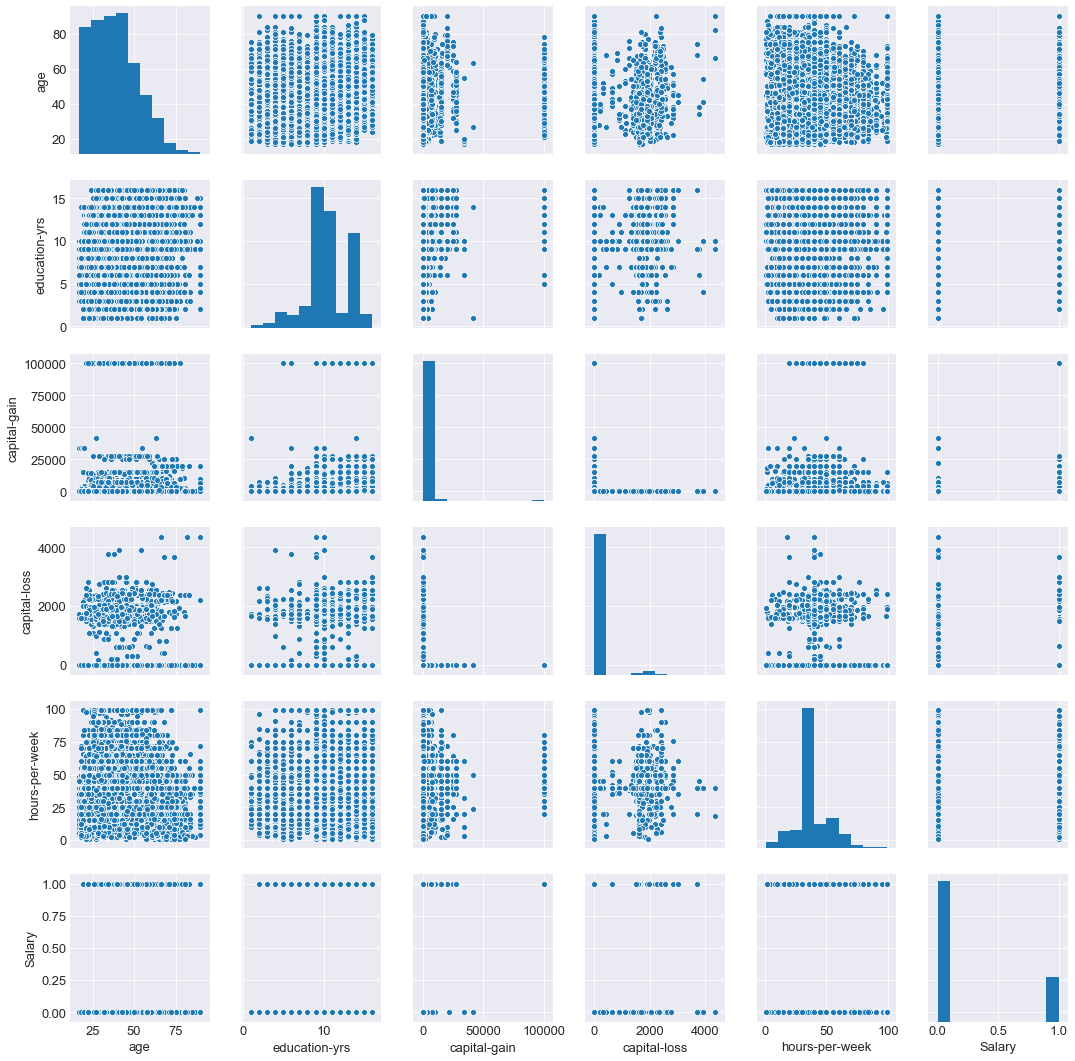

In [27]:
#Create pairplot to visualise relationships
sns.pairplot(train)

<div class='alert alert-block alert-info'>
    No clear relationship from the inital pairplot.
</div>

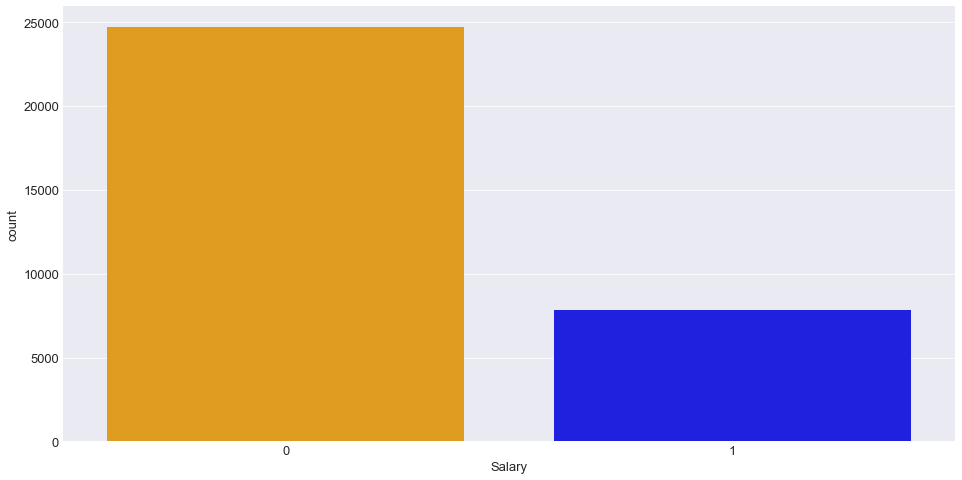

In [28]:
#Comapre count of salaries above and up to 50k
plt.figure(figsize=(16,8))
colours={0:'orange',1:'blue'}
sns.countplot(x='Salary',data=train,palette=colours)

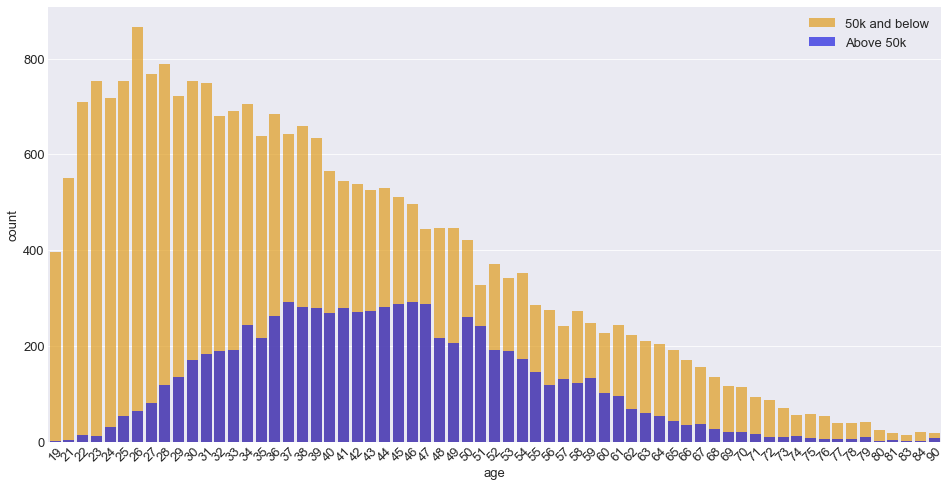

In [29]:
#compare age distribution for the two salary groups
plt.figure(figsize=(16,8))
sns.countplot(x='age',data=train[train['Salary']==0],alpha=0.7,color='orange',label='50k and below')
sns.countplot(x='age',data=train[train['Salary']==1],alpha=0.7,color='blue',label='Above 50k')
plt.legend()

plt.xticks(rotation=45)
plt.show()

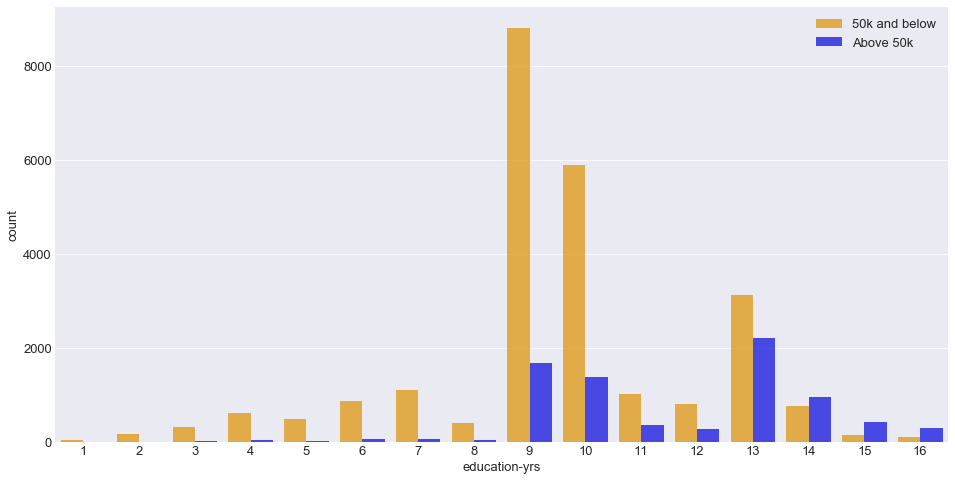

In [30]:
#compare distribution of years of education for the two salary groups
plt.figure(figsize=(16,8))
sns.countplot(x='education-yrs',data=train,hue='Salary',palette=colours,alpha=0.8)
plt.legend(['50k and below','Above 50k'])

<div class='alert alert-block alert-info'>
    Age for salaries over 50K is normally distributed but for salaries up to 50K, the age is positively skewed.  <br>
    Increase in years of education is associated with a rise in the ratio of above salaries over 50K to salaries up to 50K.
</div>

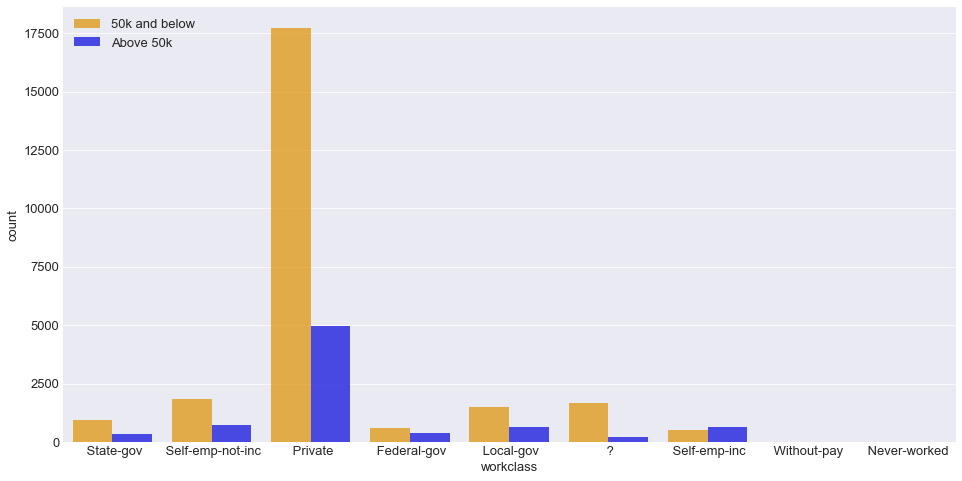

In [31]:
#compare count of the two salary groups for each work class 
plt.figure(figsize=(16,8))
sns.countplot(x='workclass',data=train,hue='Salary',palette=colours,alpha=0.8)
plt.legend(['50k and below','Above 50k'])

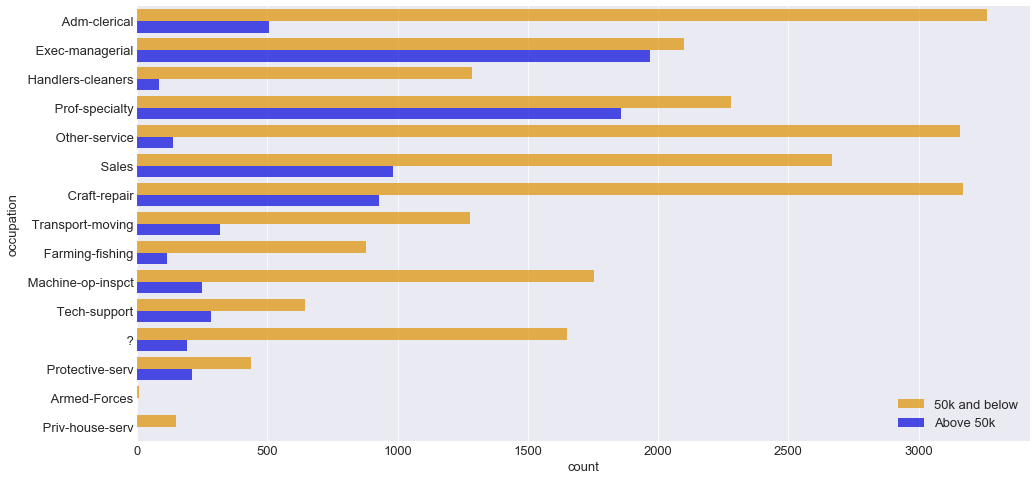

In [32]:
#comapre count of the two salary groups for each occupation
plt.figure(figsize=(16,8))
sns.countplot(y='occupation',data=train,hue='Salary',palette=colours,alpha=0.8)
plt.legend(['50k and below','Above 50k'])

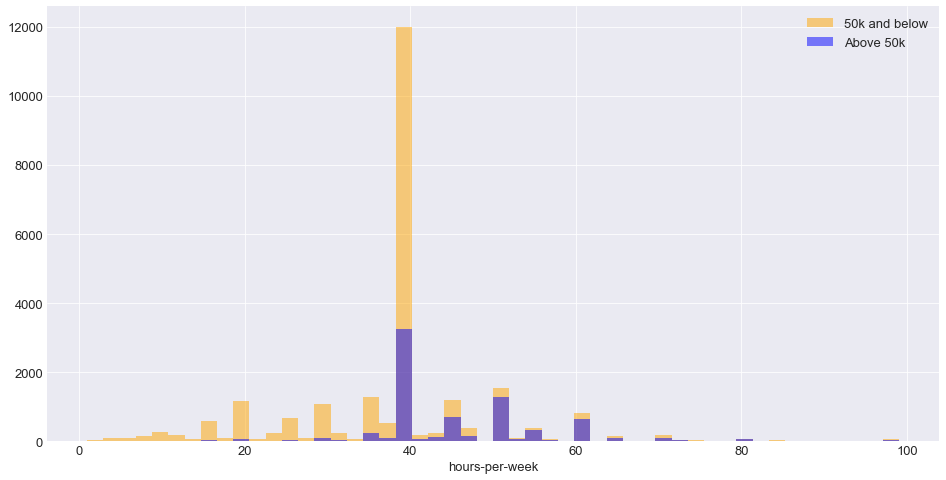

In [33]:
#Compare distribution of working hours for the two salary groups
plt.figure(figsize=(16,8))
sns.distplot(train[train['Salary']==0]['hours-per-week'],kde=False,label='50k and below',
            hist_kws={"linewidth": 3,"alpha":0.5, "color":"orange"})
sns.distplot(train[train['Salary']==1]['hours-per-week'],kde=False,label='Above 50k',
            hist_kws={"linewidth": 3,"alpha":0.5, "color":"blue"})
plt.legend()

<div class='alert alert-block alert-info'>
    Executive, managerial jobs and specialty professions are associated with a greater ratio of salaries over 50K to salaries up to 50K.<br>
    Increase in hours per week is associated with a rise in the ratio of salaries over 50K to salaries up to 50K.
</div>

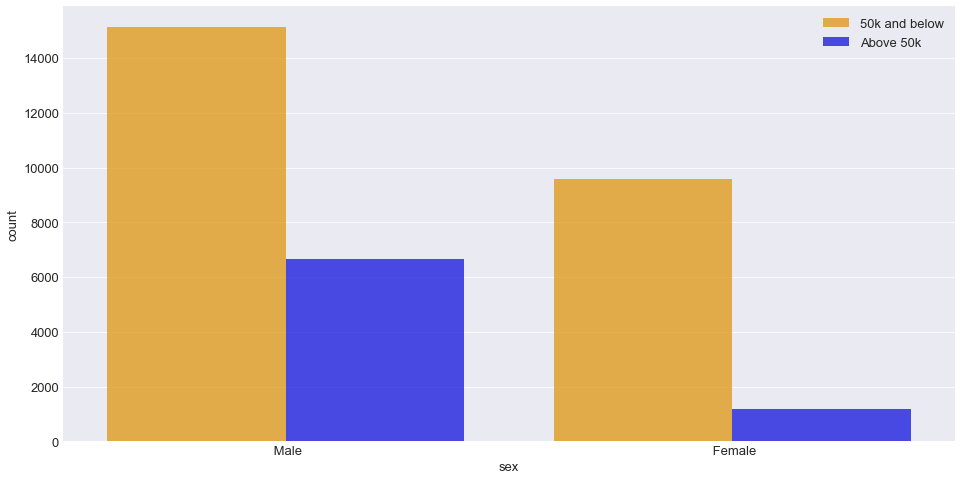

In [34]:
#Compare count of the two salary groups for each gender
plt.figure(figsize=(16,8))
sns.countplot(x='sex',data=train,hue='Salary',palette=colours,alpha=0.8)
plt.legend(['50k and below','Above 50k'])

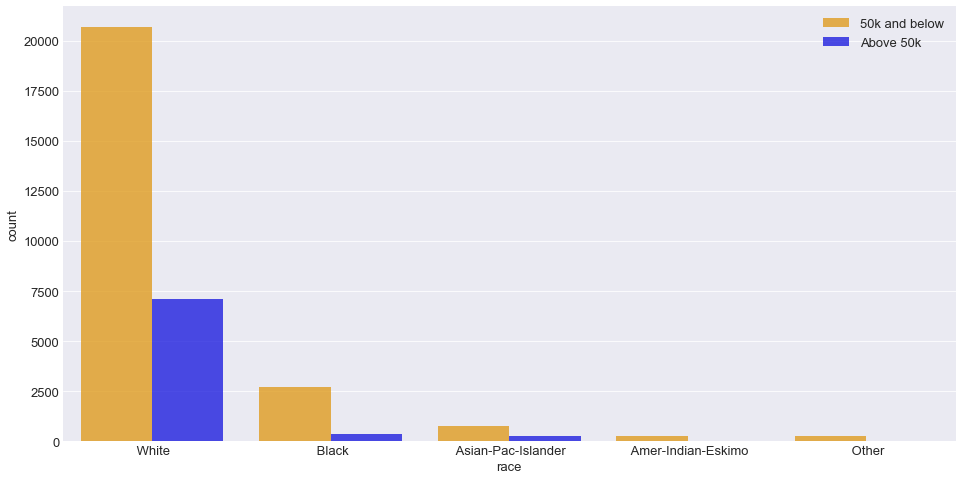

In [35]:
#Comapre the count for the two salary groups for each race
plt.figure(figsize=(16,8))
sns.countplot(x='race',data=train,hue='Salary',palette=colours,alpha=0.8)
plt.legend(['50k and below','Above 50k'])

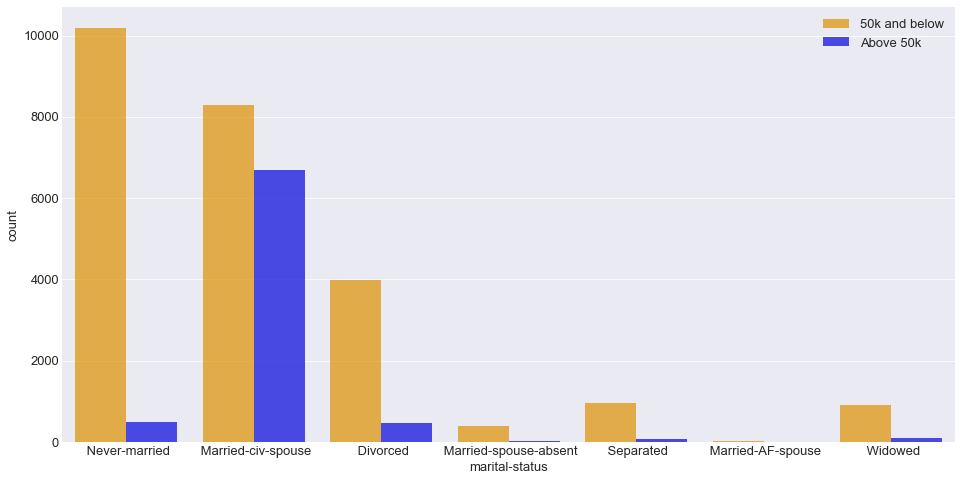

In [36]:
#Compare the counts of the two salary groups for each marital status
plt.figure(figsize=(16,8))
sns.countplot(x='marital-status',data=train,hue='Salary',palette=colours,alpha=0.8)
plt.legend(['50k and below','Above 50k'])

<div class='alert alert-block alert-info'>
    The ratio of salaries over 50K to salaries up to 50K appears closer for males than for females. <br>
    Being married to a civilian spouse is associated with a much higher ratio of salaries over 50K to salaries up to 50K.
</div>

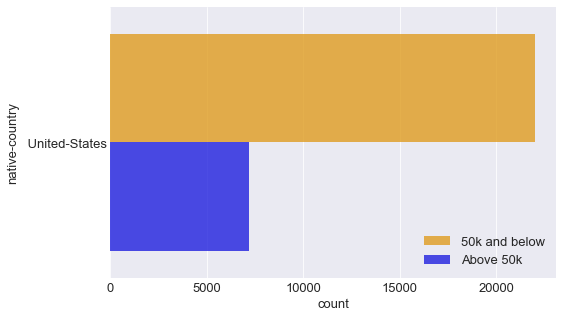

In [37]:
#Plot USA separately due to major class imbalance, otherwise other countries would not be visible
plt.figure(figsize=(8,5))
sns.countplot(y='native-country',data=train[train['native-country']==' United-States'],hue='Salary',palette=colours,alpha=0.8)
plt.legend(['50k and below','Above 50k'])

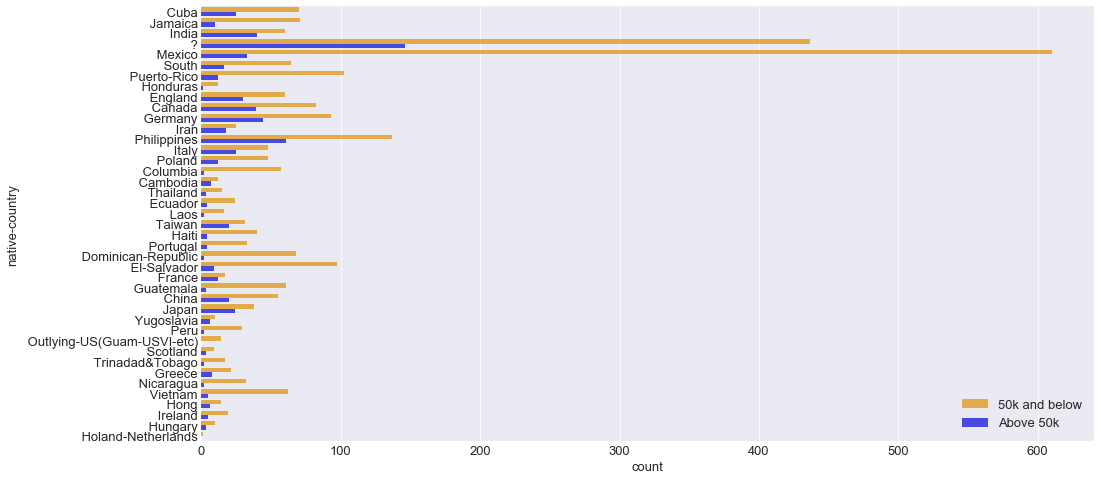

In [38]:
#Compare the counts of the two salary groups for each native country
plt.figure(figsize=(16,8))
sns.countplot(y='native-country',data=train[train['native-country']!=' United-States'],hue='Salary',palette=colours,alpha=0.8)
plt.legend(['50k and below','Above 50k'])

In [39]:
train.select_dtypes(include='object').columns

Index(['workclass', 'marital-status', 'occupation', 'race', 'sex',
       'native-country'],
      dtype='object')

In [40]:
#Create dummy variables
dummy = pd.get_dummies(train[['workclass', 'marital-status', 'occupation', 'race', 'sex','native-country']],dtype='float64')

In [41]:
dummy.shape

(32561, 80)

In [42]:
dummy.head()

,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,marital-status_ Divorced,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
#columns to drop to avoid dummy variable trap for linear models
drop_cols = ['workclass_ ?','marital-status_ Married-AF-spouse','occupation_ ?','race_ Other', 'sex_ Male','native-country_ ?']

In [44]:
#Drop original categorical columsn and add dummy variables
train_full = pd.concat([train.drop(train.select_dtypes(include='object').columns,axis=1),dummy],axis=1)

In [45]:
#Convert int columnss to float64 to prevent DataConversionWarning from scaling later on
for col in train_full.drop('Salary',axis=1).select_dtypes('int64').columns:
    train_full[col] = train_full[col].astype('float64')

In [46]:
#Separate dependent and independent variables for train set
X_train_full = train_full.drop(['Salary'],axis=1).copy()
X_train_drop = X_train_full.drop(drop_cols,axis=1).copy()
y_train = train['Salary']

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
ss_full = StandardScaler()
ss_drop = StandardScaler()

In [49]:
#Standardise features
Xs_train_full = ss_full.fit_transform(X_train_full)
Xs_train_drop = ss_drop.fit_transform(X_train_drop)

In [50]:
#check shape for training features
print(Xs_train_full.shape)
print(Xs_train_drop.shape)

(32561, 85)
(32561, 79)


In [51]:
#Load the test set
with open('./adult_test.txt',mode='r') as readfile:
    test = readfile.readlines()

In [52]:
test = [line.replace('\n','') for line in test]

In [53]:
#Convert to a DataFrame
test = pd.DataFrame([line.split(',') for line in test],
             columns=['age','workclass','fnlwgt','education','education-yrs',
                     'marital-status','occupation','relationship','race',
                     'sex','capital-gain','capital-loss','hours-per-week','native-country','Salary'],)

In [54]:
test.head()

,age,workclass,fnlwgt,education,education-yrs,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
0,|1x3 Cross validator,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
2,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
3,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
4,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.


In [55]:
test.tail()

,age,workclass,fnlwgt,education,education-yrs,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
16278,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16279,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16280,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.
16281,35,Self-emp-inc,182148,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States,>50K.
16282,,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [56]:
#Drop the extra rows
test.drop([0,16282],axis=0,inplace=True)

In [57]:
#Convert numerical columns to int
test = test.apply(pd.to_numeric,errors='ignore')

In [58]:
test['Salary'].unique()

array([' <=50K.', ' >50K.'], dtype=object)

In [59]:
#Convert Salary to 1 for above 50k and 0 otherwise
test['Salary']=[1 if entry == ' >50K.' else 0 for entry in test['Salary']]

In [60]:
#Drop columns
test.drop(['fnlwgt','relationship','education'],axis=1,inplace=True)

In [61]:
test.dtypes

age                int64
workclass         object
education-yrs      int64
marital-status    object
occupation        object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
Salary             int64
dtype: object

In [62]:
#Create dummy variables
test_dummies = pd.get_dummies(test[['workclass', 'marital-status', 'occupation', 'race', 'sex','native-country']],dtype='float64')

In [63]:
#Check the shape
test_dummies.shape

(16281, 79)

In [64]:
#Dummy variables for train and test have different no. of columns, check for difference
for item in dummy.columns:
    if item not in test_dummies.columns:
        print(item)

native-country_ Holand-Netherlands


In [65]:
#Find index for Holand
train_full.columns.get_loc('native-country_ Holand-Netherlands')

59

In [66]:
#Combine with dummy variables
test_full = pd.concat([test.drop(test.select_dtypes(include='object').columns,axis=1).copy(),test_dummies],axis=1)

In [67]:
#Convert int columnss to float64 to prevent DataConversionWarning from scaling later on
for col in test_full.drop('Salary',axis=1).select_dtypes('int64').columns:
    test_full[col] = test_full[col].astype('float64')

In [68]:
#Create test dependent and independent variables
X_test_full = test_full.drop(['Salary'],axis=1).copy()
y_test = test['Salary']

In [69]:
print(X_test_full.shape)

(16281, 84)


In [70]:
#Create DataFrame of zeros to add to the test DataFrame for Holand-Netherlands
add_col = pd.DataFrame({'native-country_ Holand-Netherlands':np.zeros(X_test_full.shape[0])})

In [71]:
add_col.head()

,native-country_ Holand-Netherlands
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [72]:
#Reset index to ensure proper concatenation
X_test_full.reset_index(drop=True,inplace=True)

In [73]:
X_train_full.columns[:59]

Index(['age', 'education-yrs', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov',
       'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay',
       'marital-status_ Divorced', 'marital-status_ Married-AF-spouse',
       'marital-status_ Married-civ-spouse',
       'marital-status_ Married-spouse-absent',
       'marital-status_ Never-married', 'marital-status_ Separated',
       'marital-status_ Widowed', 'occupation_ ?', 'occupation_ Adm-clerical',
       'occupation_ Armed-Forces', 'occupation_ Craft-repair',
       'occupation_ Exec-managerial', 'occupation_ Farming-fishing',
       'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct',
       'occupation_ Other-service', 'occupation_ Priv-house-serv',
       'occupation_ Prof-specialty', 'occupation_ Protective-serv',
       'occupat

In [74]:
X_test_full.columns[:59]

Index(['age', 'education-yrs', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov',
       'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay',
       'marital-status_ Divorced', 'marital-status_ Married-AF-spouse',
       'marital-status_ Married-civ-spouse',
       'marital-status_ Married-spouse-absent',
       'marital-status_ Never-married', 'marital-status_ Separated',
       'marital-status_ Widowed', 'occupation_ ?', 'occupation_ Adm-clerical',
       'occupation_ Armed-Forces', 'occupation_ Craft-repair',
       'occupation_ Exec-managerial', 'occupation_ Farming-fishing',
       'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct',
       'occupation_ Other-service', 'occupation_ Priv-house-serv',
       'occupation_ Prof-specialty', 'occupation_ Protective-serv',
       'occupat

In [75]:
print(X_train_full.columns[59])
print(X_test_full.columns[59])

native-country_ Honduras
native-country_ Hong


In [76]:
#Insert the column for Holand-Netherlands
X_test_full_corrected = pd.concat([X_test_full.iloc[::,:59].copy(),add_col,X_test_full.iloc[::,59:].copy()],axis=1)
X_test_drop = X_test_full_corrected.drop(drop_cols,axis=1).copy()

In [77]:
#Check train and test shapes
print(X_train_full.shape,X_train_drop.shape)
print(X_test_full_corrected.shape,X_test_drop.shape)

(32561, 85) (32561, 79)
(16281, 85) (16281, 79)


In [78]:
Xs_test_full = ss_full.transform(X_test_full_corrected)
Xs_test_drop = ss_drop.transform(X_test_drop)

## Modelling

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import f1_score,confusion_matrix,classification_report, accuracy_score
from sklearn.pipeline import Pipeline

In [80]:
#Baseline accuracy for train
len(y_train[y_train==0])/len(y_train)

0.7591904425539756

In [81]:
#Baseline accuracy for test
len(y_test[y_test==0])/len(y_test)

0.7637737239727289

In [82]:
#Baseline f1_macro score for test
f1_score(y_test,np.zeros(y_test.shape[0]),average='macro')

C:\Users\kwanw\Anaconda3\envs\tf\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.4330338487254492

In [83]:
def train_cross_val(model,X,y):
    '''
    This function takes in a model, independent and dependent variables and returns the mean cross validated F1 score and standard deviation of the scores
    '''
    scores = cross_val_score(model,X,y,cv=10,n_jobs=-1,scoring='f1_macro')
    
    print('mean score: {:.04f}'.format(np.mean(scores)))
    print('scores std: {:.04f}'.format(np.std(scores)))
          
    return round(np.mean(scores),4),round(np.std(scores),4)

In [84]:
train_compare = pd.DataFrame({'Model':[],'Mean F1 score':[],'F1 score std':[]})

def train_table(name,mean,std):
    '''
    This function takes in a model name, mean F1 score and scores std and adds it to a table for comparison with other models
    '''
    #Allow modification of global variable
    global train_compare
    #Concatenate the new results to the DataFrame
    new_entry = pd.DataFrame({'Model':[name],'Mean F1 score':[mean],'F1 score std':[std]})
    train_compare = pd.concat([train_compare,new_entry],axis=0)
    
    return train_compare

In [85]:
def test_scoring(model,X_train,y_train,X_test,y_test):
    '''
    This function takes in a model, train variables and target, test variables and target and returns the F1 score and predicted classes.
    It also prints the AUC score and classification report.
    '''
    #Fit the full training data to the model
    model.fit(X_train,y_train)
    #Predict classes for test set and classification_reporte F1 score
    pred = model.predict(X_test)
    score = f1_score(y_test,pred,average='macro')
    
    #print the F1 score
    print('F1 score: {:.04f}'.format(score))
    print()
    
    #print the classification report
    print(classification_report(y_test,pred))
    
    return round(score,4),pred

In [86]:
test_compare = pd.DataFrame({'Model':[],'F1 score':[]})

def test_table(name,score):
    '''
    This function takes in a model name, mean score and scores std and adds it to a table for comparison with other models
    '''
    #Allow modification of global variable
    global test_compare
    #Concatenate the new results to the DataFrame
    new_entry = pd.DataFrame({'Model':[name],'F1 score':[score]})
    test_compare = pd.concat([test_compare,new_entry],axis=0)
    
    return test_compare

In [87]:
logr = LogisticRegression()

In [88]:
#Create pipeline for scaling and applying logistic regression
logr_pipe = Pipeline(steps=[
    ('scaler',StandardScaler()),
    ('logr',LogisticRegression())
])

In [89]:
#Cross validate the model
logr_mean_score, logr_std = train_cross_val(logr_pipe,X_train_drop,y_train)

mean score: 0.7821
scores std: 0.0074


In [90]:
#Add training scores for comparison
train_table('Logistic Regression',logr_mean_score, logr_std)

,Model,Mean F1 score,F1 score std
0,Logistic Regression,0.7821,0.0074


In [91]:
#Score the model on the test set
logr_score, logr_pred = test_scoring(logr_pipe,X_train_drop,y_train, X_test_drop,y_test)

C:\Users\kwanw\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


F1 score: 0.7796

              precision    recall  f1-score   support

           0       0.88      0.93      0.91     12435
           1       0.73      0.59      0.65      3846

   micro avg       0.85      0.85      0.85     16281
   macro avg       0.81      0.76      0.78     16281
weighted avg       0.85      0.85      0.85     16281



In [92]:
#Add the test for comparison
test_table('Logistic Regression', logr_score)

,Model,F1 score
0,Logistic Regression,0.7796


Cross validated scores and the test score is pretty close. See if a better score can be achieved with lower regularization.

In [93]:
#Create gridsearch parameters for the logistic regression pipeline
logr_params ={
    'logr__penalty':['l1','l2'],
    'logr__C':[0.01,0.1,0.3,0.5,0.7],
    'logr__solver':['liblinear','saga']
}

search_logr = GridSearchCV(logr_pipe,param_grid=logr_params,cv=10,n_jobs=-1,verbose=1,scoring='f1_macro')

In [94]:
#Search for the optimal hyperparameters
search_logr.fit(X_train_drop,y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  3.1min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'logr__penalty': ['l1', 'l2'], 'logr__C': [0.01, 0.1, 0.3, 0.5, 0.7], 'logr__solver': ['liblinear', 'saga']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1_macro', verbose=1)

In [95]:
#Check the best score
search_logr.best_score_

0.7822725186522802

In [96]:
#Check the best estimator
search_logr.best_estimator_

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logr', LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False))])

In [97]:
optimal_logr = search_logr.best_estimator_

In [98]:
#Cross validate the best estimator
tuned_logr_mean_score, tuned_logr_std = train_cross_val(optimal_logr,X_train_drop,y_train)

mean score: 0.7823
scores std: 0.0072


In [99]:
#Add training scores for comparison
train_table('Tuned Logistic Regression',tuned_logr_mean_score, tuned_logr_std)

,Model,Mean F1 score,F1 score std
0,Logistic Regression,0.7821,0.0074
0,Tuned Logistic Regression,0.7823,0.0072


In [100]:
#Score the model on the test set
tuned_logr_score, tuned_logr_pred = test_scoring(optimal_logr,X_train_drop,y_train, X_test_drop,y_test)

F1 score: 0.7797

              precision    recall  f1-score   support

           0       0.88      0.93      0.91     12435
           1       0.73      0.59      0.65      3846

   micro avg       0.85      0.85      0.85     16281
   macro avg       0.81      0.76      0.78     16281
weighted avg       0.85      0.85      0.85     16281



In [101]:
#Add the test for comparison
test_table('Tuned Logistic Regression', tuned_logr_score)

,Model,F1 score
0,Logistic Regression,0.7796
0,Tuned Logistic Regression,0.7797


In [102]:
search_logr.best_params_

{'logr__C': 0.5, 'logr__penalty': 'l2', 'logr__solver': 'liblinear'}

In [103]:
tuned_logr = LogisticRegression(C=0.5,penalty='l2',solver='liblinear')
tuned_logr.fit(Xs_train_drop,y_train)

logr_results = pd.DataFrame({'Features':X_train_drop.columns,'coef':tuned_logr.coef_[0],'abs coef':abs(tuned_logr.coef_[0])})

In [104]:
logr_top15 = logr_results.sort_values('abs coef',ascending=False).head(15)

Text(0.5, 0, 'Coefficients')

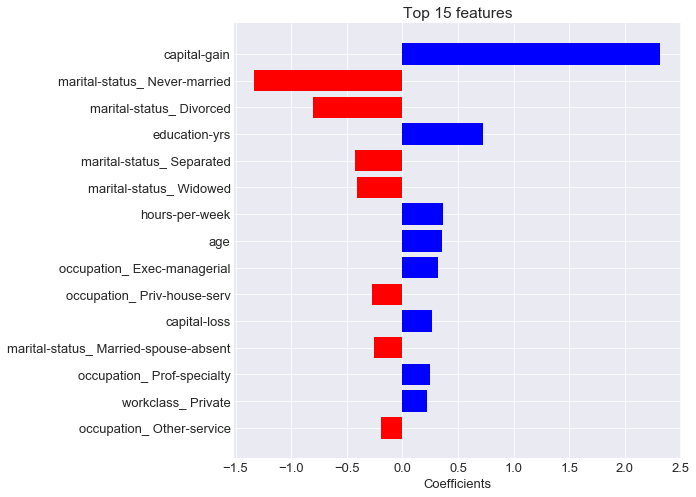

In [105]:
#Plot the top 15 features and their feature importance
plt.figure(figsize=(8,8))

#Create list of colour assignments, blue for positive, red for negative
logr_colours = ['red' if coef < 0  else 'blue' for feature,coef in zip(logr_top15.sort_values('abs coef')['Features'],logr_top15.sort_values('abs coef')['coef'])]

plt.barh(y=logr_top15.sort_values('abs coef')['Features'],width=logr_top15.sort_values('abs coef')['coef'],color=logr_colours)

plt.title('Top 15 features')
plt.xlabel('Coefficients')

## Support Vector Machine

In [107]:
#Create pipeline for scaling and support vector classifier
svc_pipe = Pipeline(steps=[
    ('scaler',StandardScaler()),
    ('svc',SVC())
])

In [108]:
#Cross validate the model
svc_mean_score, svc_std = train_cross_val(svc_pipe,X_train_full,y_train)

mean score: 0.7751
scores std: 0.0056


In [109]:
#Add training scores for comparison
train_table('Support Vector Machine',svc_mean_score, svc_std)

,Model,Mean F1 score,F1 score std
0,Logistic Regression,0.7821,0.0074
0,Tuned Logistic Regression,0.7823,0.0072
0,Support Vector Machine,0.7751,0.0056


In [110]:
#Score the model on the test set
svc_score, svc_pred = test_scoring(svc_pipe,X_train_full,y_train, X_test_full_corrected,y_test)

F1 score: 0.7790

              precision    recall  f1-score   support

           0       0.88      0.94      0.91     12435
           1       0.74      0.58      0.65      3846

   micro avg       0.85      0.85      0.85     16281
   macro avg       0.81      0.76      0.78     16281
weighted avg       0.85      0.85      0.85     16281



In [111]:
#Add the test for comparison
test_table('Support Vector Machine', svc_score)

,Model,F1 score
0,Logistic Regression,0.7796
0,Tuned Logistic Regression,0.7797
0,Support Vector Machine,0.7790


Test score is actually higher than the cross-validated scores for SVM.See if scores can be improved with tuning, trying other kernels and lowering the regularization.

In [112]:
#Set up gridsearch for SVM pipeline
svc_params ={
    'svc__kernel':['rbf','linear','poly'],
    'svc__C':[0.1,0.3,0.5,0.7,0.8],
    'svc__gamma':['auto_deprecated','scale']
}

search_svc = GridSearchCV(svc_pipe,param_grid=svc_params,cv=5,n_jobs=-1,verbose=1,scoring='f1_macro')

In [113]:
search_svc.fit(X_train_full,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 13.8min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 53.2min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'svc__kernel': ['rbf', 'linear', 'poly'], 'svc__C': [0.1, 0.3, 0.5, 0.7, 0.8], 'svc__gamma': ['auto_deprecated', 'scale']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1_macro', verbose=1)

In [114]:
#Check the best score
search_svc.best_score_

0.7803305272400761

In [115]:
#Check the best hyperparameters
search_svc.best_estimator_

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=0.7, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

In [116]:
#Cross validate the best estimator
tuned_svc_mean_score, tuned_svc_std = train_cross_val(search_svc.best_estimator_,Xs_train_full,y_train)

mean score: 0.7803
scores std: 0.0063


In [117]:
#Add training scores for comparison
train_table('Tuned Support Vector Machine',tuned_svc_mean_score, tuned_svc_std)

,Model,Mean F1 score,F1 score std
0,Logistic Regression,0.7821,0.0074
0,Tuned Logistic Regression,0.7823,0.0072
0,Support Vector Machine,0.7751,0.0056
0,Tuned Support Vector Machine,0.7803,0.0063


In [118]:
#Score the model on the test set
tuned_svc_score, tuned_svc_pred = test_scoring(search_svc.best_estimator_,Xs_train_full,y_train,Xs_test_full,y_test)

F1 score: 0.7816

              precision    recall  f1-score   support

           0       0.88      0.93      0.91     12435
           1       0.73      0.59      0.66      3846

   micro avg       0.85      0.85      0.85     16281
   macro avg       0.81      0.76      0.78     16281
weighted avg       0.85      0.85      0.85     16281



In [119]:
#Add the test for comparison
test_table('Tuned Support Vector Machine',tuned_svc_score)

,Model,F1 score
0,Logistic Regression,0.7796
0,Tuned Logistic Regression,0.7797
0,Support Vector Machine,0.7790
0,Tuned Support Vector Machine,0.7816


In [120]:
search_svc.best_params_

{'svc__C': 0.7, 'svc__gamma': 'auto_deprecated', 'svc__kernel': 'linear'}

In [121]:
#Create and train svm model based on best hyperparameters
optimal_svc = SVC(C=0.7,gamma='auto_deprecated',kernel='linear')
optimal_svc.fit(Xs_train_full,y_train)

optimal_svc_results = pd.DataFrame({'Feature':X_train_full.columns,'coef':optimal_svc.coef_[0],'abs_coef':abs(optimal_svc.coef_[0])})

In [122]:
svm_top15 = optimal_svc_results.sort_values('abs_coef',ascending=False).head(15)

Text(0.5, 0, 'Coefficients')

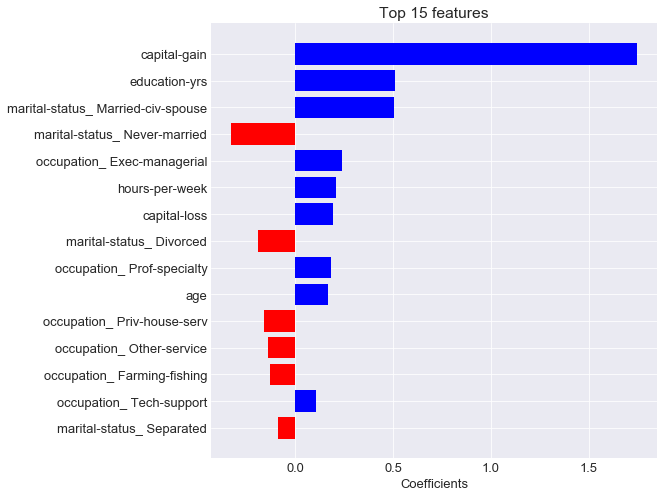

In [123]:
#Plot the top 15 features and their feature importance
plt.figure(figsize=(8,8))

#Create list of colour assignments, blue for positive, red for negative
svm_colours = ['red' if coef < 0  else 'blue' for feature,coef in zip(svm_top15.sort_values('abs_coef')['Feature'],svm_top15.sort_values('abs_coef')['coef'])]

plt.barh(y=svm_top15.sort_values('abs_coef')['Feature'],width=svm_top15.sort_values('abs_coef')['coef'], color = svm_colours)

plt.title('Top 15 features')
plt.xlabel('Coefficients')

## Random Forest

In [124]:
rfc = RandomForestClassifier(n_estimators=100)

In [125]:
#Cross validate the model
rfc_mean_score, rfc_svc_std = train_cross_val(rfc,X_train_full,y_train)

mean score: 0.7828
scores std: 0.0106


In [126]:
#Add training scores for comparison
train_table('Random Forest',rfc_mean_score, rfc_svc_std)

,Model,Mean F1 score,F1 score std
0,Logistic Regression,0.7821,0.0074
0,Tuned Logistic Regression,0.7823,0.0072
0,Support Vector Machine,0.7751,0.0056
0,Tuned Support Vector Machine,0.7803,0.0063
0,Random Forest,0.7828,0.0106


In [127]:
#Score the model on the test set
rfc_score, rfc_pred = test_scoring(rfc,X_train_full,y_train,X_test_full_corrected,y_test)

F1 score: 0.7771

              precision    recall  f1-score   support

           0       0.88      0.92      0.90     12435
           1       0.70      0.61      0.65      3846

   micro avg       0.85      0.85      0.85     16281
   macro avg       0.79      0.76      0.78     16281
weighted avg       0.84      0.85      0.84     16281



In [128]:
#Add the test for comparison
test_table('Random Forest',rfc_score)

,Model,F1 score
0,Logistic Regression,0.7796
0,Tuned Logistic Regression,0.7797
0,Support Vector Machine,0.7790
0,Tuned Support Vector Machine,0.7816
0,Random Forest,0.7771


Test and cross-validated scores are very close once again, although the standard deviation of the cross-validated scores seems a bit higher than other models. Try increasing the number of estimators and controlling the depth of the trees to try and improve the model's performance.

In [129]:
#Set up gridsearch for Random Forest
RandomForestClassifier()
rfc_params ={
    'n_estimators':[100,200,300],
    'max_depth':[None,5,10,20,30],
    'random_state':[42]
}

rfc_search = GridSearchCV(rfc,param_grid=rfc_params,cv=10,n_jobs=-1,verbose=1,scoring='f1_macro')

In [130]:
rfc_search.fit(X_train_full,y_train)

Fitting 10 folds for each of 15 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   57.1s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  3.5min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10, 20, 30], 'random_state': [42]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1_macro', verbose=1)

In [131]:
rfc_search.best_score_

0.7978822007932816

In [132]:
rfc_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [133]:
#Cross validate the model
tuned_rfc_mean_score, tuned_rfc_svc_std = train_cross_val(rfc_search.best_estimator_,X_train_full,y_train)

mean score: 0.7979
scores std: 0.0070


In [134]:
#Add training scores for comparison
train_table('Tuned Random Forest',tuned_rfc_mean_score, tuned_rfc_svc_std)

,Model,Mean F1 score,F1 score std
0,Logistic Regression,0.7821,0.0074
0,Tuned Logistic Regression,0.7823,0.0072
0,Support Vector Machine,0.7751,0.0056
0,Tuned Support Vector Machine,0.7803,0.0063
0,Random Forest,0.7828,0.0106
0,Tuned Random Forest,0.7979,0.0070


In [135]:
#Score the model on the test set
tuned_rfc_score, tuned_rfc_pred = test_scoring(rfc_search.best_estimator_,X_train_full,y_train,X_test_full_corrected,y_test)

F1 score: 0.7976

              precision    recall  f1-score   support

           0       0.88      0.95      0.92     12435
           1       0.78      0.60      0.68      3846

   micro avg       0.87      0.87      0.87     16281
   macro avg       0.83      0.77      0.80     16281
weighted avg       0.86      0.87      0.86     16281



In [136]:
#Add the test for comparison
test_table('Tuned Random Forest',tuned_rfc_score)

,Model,F1 score
0,Logistic Regression,0.7796
0,Tuned Logistic Regression,0.7797
0,Support Vector Machine,0.7790
0,Tuned Support Vector Machine,0.7816
0,Random Forest,0.7771
0,Tuned Random Forest,0.7976


In [137]:
#Fit the full training data to the best estimator
rfc_search.best_estimator_.fit(X_train_full,y_train)

#Retrieve the feature importances from the model
rf_feat = pd.DataFrame(data = rfc_search.best_estimator_.feature_importances_,
                      index = X_train_full.columns,
                      columns=['Feature Importance'])

In [138]:
top_15 = rf_feat.sort_values('Feature Importance',ascending=False).head(15)

Text(0.5, 0, 'Feature Importance')

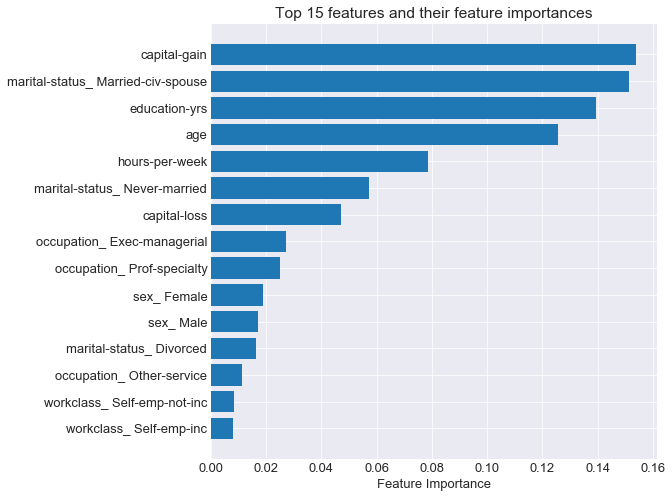

In [139]:
#Plot the top 15 features and their feature importance
plt.figure(figsize=(8,8))
plt.barh(y=top_15.sort_values('Feature Importance').index,width=top_15.sort_values('Feature Importance')['Feature Importance'])

plt.title('Top 15 features and their feature importances')
plt.xlabel('Feature Importance')

In [140]:
#Check accuracy score (baseline is 0.76)
accuracy_score(y_test,tuned_rfc_pred)

0.8661015908113753

In [141]:
#Create confusion matrix of results
tuned_rf_cm = pd.DataFrame(data=confusion_matrix(y_test,tuned_rfc_pred),
                          index=['Actual Up to 50K','Actual Above 50k'],
                          columns=['Pred Up to 50K','Pred Above 50k'])

In [142]:
tuned_rf_cm

,Pred Up to 50K,Pred Above 50k
Actual Up to 50K,11787,648
Actual Above 50k,1532,2314


In [144]:
from sklearn.metrics import roc_curve,auc

In [143]:
tuned_rfc_pred_proba = rfc_search.best_estimator_.predict_proba(X_test_full_corrected)

In [145]:
#Retrieve the false aand true positive rates at various thresholds
fpr, tpr, threshold = roc_curve(y_test,tuned_rfc_pred_proba[:,1])

Text(0, 0.5, 'True Positive Rate')

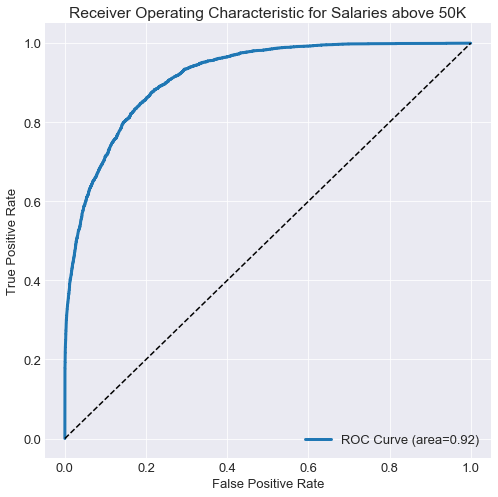

In [146]:
#Plot the ROC curve
plt.figure(figsize=(8,8))

plt.plot(fpr,tpr, linewidth=3, label='ROC Curve (area={:0.2f})'.format(auc(fpr,tpr)))
plt.plot([0,1],[0,1], linestyle='--',color='k')
plt.legend(loc='lower right')

plt.title('Receiver Operating Characteristic for Salaries above 50K')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

<div class='alert alert-block alert-info'>
    The Random Forest classifier performed the best, with an F1 macro score of about 0.798. Since about split of participants was about 3:1, the baseline score for accuracy was already rather high and an F1-score might be a better representation of the performance of the models since it would take recall into account was well. With that said, the model did improve the baseline accuracy of 0.763 to 0.866. From the Random Forest model, the features that contributed most to distinguishing between the two salary bands were capital gain, marrying a civilian spouse, years of education and age.